In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Se utiliza como código principal el que se muestra a continuación, donde se encuentran los distintos parámetros del modelo y los vectores conformados por las variables $u$ y $v$. Para ello se realiza un proceso de iteración donde se especifica que si las variables asumen un cierto valor, estas se deben resetear a los valores que uno determine.

In [11]:
a = 0.02
b = 0.25
c = -65.0
d = 2.0
Vr = -65.0 #mV es el potencial de reposo 
Vum = 30.0 #mV 

h = 0.10
t = [(i/10) for i in range(0,2000)]
v = Vr*np.ones(len(t))
u = b*v
I = 10*np.ones(len(t))

for i in range(0,len(t)-1):
    if t[i] < 10:
        I[i] = 0
        v[i] = Vr
        u[i] = b*v[i]
    else:
        I[i] = 10
        v[i+1] = v[i]+h*(0.04*v[i]**2+5*v[i]+140-u[i]+I[i])
        u[i+1] = u[i]+h*(a*(b*v[i]-u[i]))
        if v[i] >= Vum:
            v[i] = Vum
            v[i+1] = c
            u[i+1] = u[i+1] + d

Parámetros para cada neurona: 


|Neurona|  a   |  b   |c     | d    |
|:-----:|:----:|:----:|:----:|:----:|
|RS     |0.02  |0.2   | -65mV| 8    |
|IB     |0.02  |0.2   | -55mV| 4    |
|CH     |0.02  |0.2   | -50mV| 2    |
|FS     |0.1   |0.2   | -60mV| 2    |
|LTS    |0.02  |0.25  | -65mV| 2    |
|TC     |0.01  |0.12  | -63mV| 1    |
|RZ     |0.1   |0.26  | -65mV| 2    |

### Gráficos del comportamiento de las neuronas

Al ir cambiando los parámetros en el primer código luego esto se reproduce en los gráficos.  

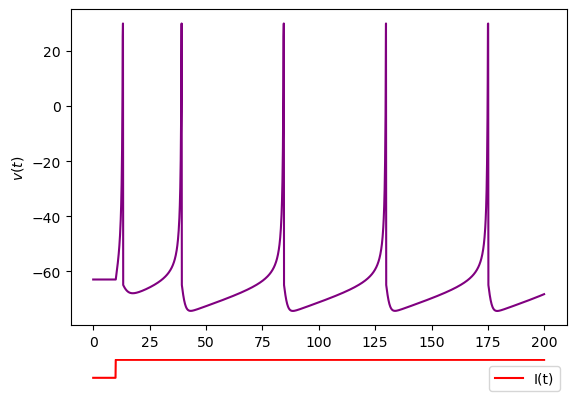

In [60]:
fig, axs = plt.subplots(2, gridspec_kw={'height_ratios': [8, 0.5]})

#plot 1
axs[0].plot(t,v, c = 'purple', ls = '-')
axs[0].set(ylabel = '$v(t)$')
#plot 2
axs[1].plot(t,I, label = 'I(t)', c = 'red')
axs[1].axis('off')
plt.legend(loc = 'upper right')

#plt.savefig('TC.pdf') 
plt.show()

Para poder reproducir el comportamiento de la neurona _thalamo cortical_ cuando recibe una corriente externa negativa, que hace que se hiperpolarice, se utiliza el código que esta a continuación.  

In [14]:
a = 0.01
b = 0.12
c = -63.0
d = 1.0
Vr = -87.0 #mV es el potencial de reposo 
Vum = 30.0 #mV 

#Valores iniciales
h = 0.10
t = [(i/10) for i in range(0, 2000)]
v1 = Vr*np.ones(len(t))
u1 = b*v1
I = 10*np.ones(len(t))

for i in range(0, len(t)-1):
    if t[i] <= 10:
        I[i] = 0
        v1[i] = Vr
        u1[i] = b*v1[i]
    elif 10 < t[i] <= 40:
        I[i] = 10
        v1[i+1] = v1[i]+h*(0.04*v1[i]**2+5*v1[i]+140-u1[i]+I[i])
        u1[i+1] = u1[i]+h*(a*(b*v1[i]-u1[i]))
        if v1[i] >= Vum:
            v1[i] = Vum
            v1[i+1] = c
            u1[i+1] = u1[i+1] + d
    else:
        b = 0.10
        I[i] = 10
        v1[i+1] = v1[i]+h*(0.04*v1[i]**2+5*v1[i]+140-u1[i]+I[i])
        u1[i+1] = u1[i]+h*(a*(b*v1[i]-u1[i]))
        if v1[i] >= Vum:
            v1[i] = Vum
            v1[i+1] = c
            u1[i+1] = u1[i+1] + d

In [15]:
I1 = []
for i in I:
    if i==0:
        i = -10
    else:
        i = 0
    I1.append(i)

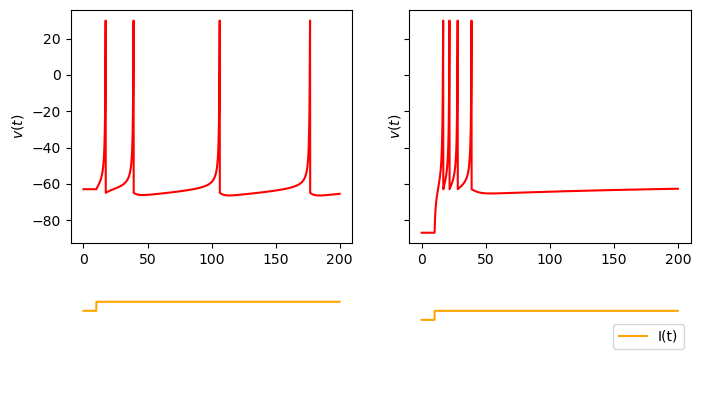

In [57]:
fig, xs = plt.subplots(2,2, figsize=(8,5), gridspec_kw={'height_ratios': [8, 4]}, sharey = True)

#plot 1
xs[0,0].plot(t,v, c = 'r', ls = '-')
xs[0,0].set(ylabel = '$v(t)$')
#plot 2
xs[1,0].plot(t,I, label = 'I(t)', c = 'orange')
xs[1,0].axis('off')
#plot 1.2
xs[0,1].plot(t,v1, c = 'r', ls = '-')
xs[0,1].set(ylabel = '$v(t)$')
#plot 2
xs[1,1].plot(t,I1, label = 'I(t)', c = 'orange')
xs[1,1].axis('off')
plt.legend(loc = 'right')

plt.savefig('TC2.pdf') 
plt.show()

Otro tipo de dinámica que puede exhibir este modelo es la neurona *Resonator (RZ)*.

In [16]:
a = 0.1
c = -65.0
d = 2.0
Vr = -65.0 #mV es el potencial de reposo 
Vum = 30.0 #mV 

#Valores iniciales
h = 0.10
t = [(i/10) for i in range(0, 2500)]
v2 = np.ones(len(t))
u2 = np.ones(len(t))
I = np.ones(len(t))

for i in range(0, len(t)-1):
    if t[i] <= 10:
        b = 0.2566
        v2[i] = Vr 
        u2[i] = b*Vr
    if 10 < t[i] <= 100:
        I[i] = 0.016
        b = 0.26
        v2[i+1] = v2[i]+h*(0.04*v2[i]**2+5*v2[i]+140-u2[i]+I[i])
        u2[i+1] = u2[i]+h*(a*(b*v2[i]-u2[i])) 
        if v2[i] >= Vum:
            v2[i] = Vum
            v2[i+1] = c
            u2[i+1] = u2[i+1] + d
    else:
        I[i] = 0.3
        b = 0.26
        v2[i+1] = v2[i]+h*(0.04*v2[i]**2+5*v2[i]+140-u2[i]+I[i])
        u2[i+1] = u2[i]+h*(a*(b*v2[i]-u2[i])) 
        if v2[i] >= Vum:
            v2[i] = Vum
            v2[i+1] = c
            u2[i+1] = u2[i+1] + d

In [39]:
I2 = []
for i in range(0, len(t)):
    if t[i] <= 10:
        I = 0
    elif 113 < t[i] <= 116:
        I = 2
    else:
        I = 1
    I2.append(I)    

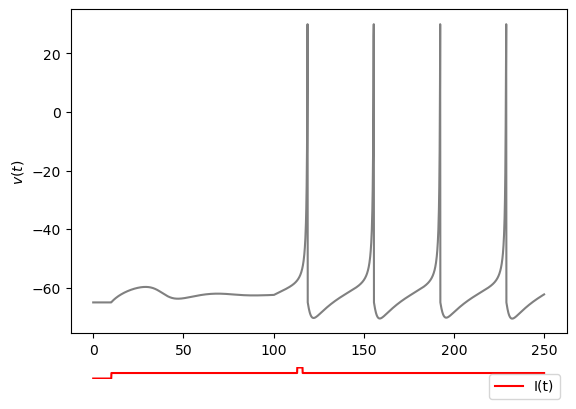

In [44]:
fig, yx = plt.subplots(2, gridspec_kw={'height_ratios': [8, 0.3]})

#plot 1
yx[0].plot(t,v2, c = 'grey', ls = '-')
yx[0].set(ylabel = '$v(t)$')
#plot 2
yx[1].plot(t,I2, label = 'I(t)', c = 'red')
yx[1].axis('off')
plt.legend(loc = 'upper right')

plt.savefig('RZ.pdf')
plt.show()

Con ayuda del polinomio característicos se observa el comportamiento entre las variables $u$ y $v$:
$P(\lambda) = \lambda^2 +(a-0.08v-5)\lambda + (b-0.08v-5)*a = 0$ 

### Neuronas RS, CH, IB
En este tipo de neuronas $b=0.2$, $a=0.02$ y suponiendo una corriente $I = 0$, dado que estamos buscando los puntos fijos del sistema de ecuaciones, los valores de $v$ según la siguiente ecuación: 
$0.04v^2 + 4.8v + 140=0$ son $v_1 = -50mV$ y $v_2 = -70mv$. Reemplazando en el polinomio los parámetros por sus valores y $v = v_2$.

$P(\lambda) = \lambda^2 + 0.62 \lambda + 0.016 = 0 \rightarrow \lambda_1 \approx -0.027, \lambda_2 \approx -0.593$ 

Cambiando los parámetros en el código correspondiente a estas neuronas y luego reproduciendo el siguiente código para el gráfico se observa el comportamiento de las dos variables:

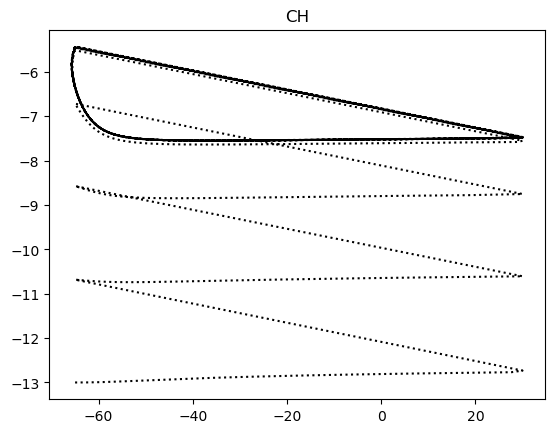

In [5]:
plt.plot(v, u, linestyle = 'dotted', color = 'black')
plt.title('CH')
plt.savefig('CHvu.pdf')
plt.show()

### Neuronas FS, LTS 

Con $a=0.1$ y $b=0.2$:

Calculamos los v: 

$0.04v^2 + 4.8v + 140=0$ son $v_1 = -50mV$ y $v_2 = -70mv$

Con $a=0.1$, $b=0.2$ y $v_2 = -70$:

$P(\lambda) = \lambda^2 +(a-0.08v-5)\lambda + (b-0.08v-5)*a = 0$:

$P(\lambda) = \lambda^2 +0.7 \lambda + 0.08 = 0 \rightarrow \lambda_1 \approx -0.143845, \lambda_2 \approx -0.556155$ 

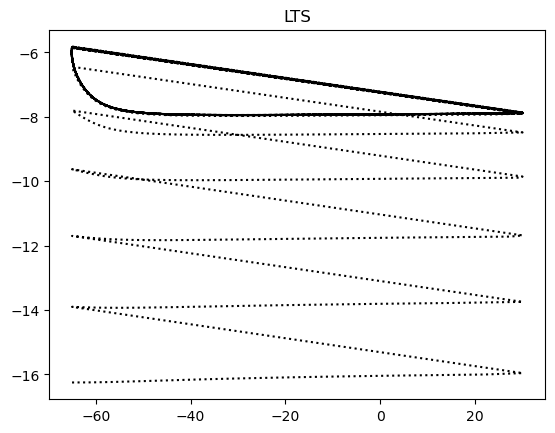

In [12]:
plt.plot(v, u, linestyle = 'dotted', color = 'black')
plt.title('LTS')
plt.savefig('LTSuv.pdf')
plt.show()

### Neurona Thalamo-cortical
Con $a=0.01$ y $b=0.12$:

Calculamos los v: 

$0.04v^2 + 4.88v + 140=0 \rightarrow v_1 \approx -46mV y v_2 \approx -75.8661mv$

Con $a=0.1$, $b=0.26$ y $v_2 = -75.8661$:

$P(\lambda) = \lambda^2 +(a-0.08v-5)\lambda + (b-0.08v-5)*a = 0$:

$P(\lambda) = \lambda^2 + 1.079288 \lambda + 0.01189 = 0 \rightarrow \lambda_1 \approx -0.011131, \lambda_2 \approx -1.0681567$ 

<Figure size 640x480 with 0 Axes>

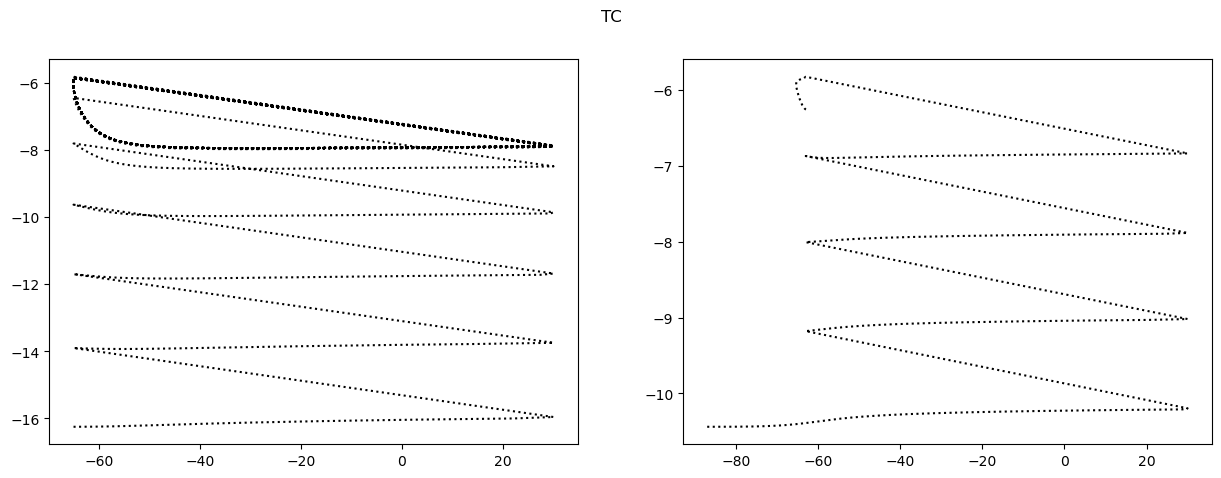

In [36]:
fig, t = plt.subplots(1,2,figsize = (15,5), gridspec_kw={'width_ratios': [10, 10]})
t[0].plot(v, u, linestyle = 'dotted', color = 'black')
t[1].plot(v1, u1, ls = 'dotted', color = 'black')

plt.suptitle('TC')
plt.savefig('TCuv.pdf')
plt.show()

### Neurona Rezonator

Con $a=0.1$ y $b=0.26$:

Calculamos los v: 

$0.04v^2 + 4.74v + 140=0 \rightarrow v_1 = -56mV y v_2 = -62.5mv$

Con $a=0.1$, $b=0.26$ y $v_2 = -62.5$:

$P(\lambda) = \lambda^2 +(a-0.08v-5)\lambda + (b-0.08v-5)*a = 0$:

$P(\lambda) = \lambda^2 + 0.1 \lambda + 0.026 = 0 \rightarrow \lambda_1 \approx -\dfrac{1}{20} + 0.1532971i, \lambda_2 \approx -\dfrac{1}{20} - 0.1532971i$ 

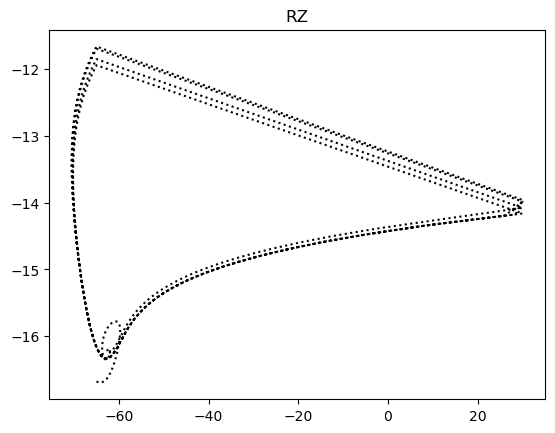

In [37]:
plt.plot(v2, u2, linestyle = 'dotted', color = 'black')
plt.title('RZ')
plt.savefig('RZuv.pdf')
plt.show()